<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/Logistic_regression_end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic regression end to end**

Create moons dataset.

In [0]:
from sklearn.datasets import make_moons
m=1000
X_moons,y_moons=make_moons(m,noise=0.1, random_state=42)

Plot the data:

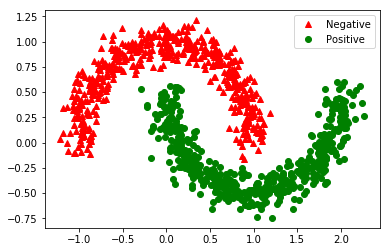

In [2]:
from matplotlib import pyplot as plt
plt.plot(X_moons[y_moons==0,0],X_moons[y_moons==0,1], 'r^', label='Negative')
plt.plot(X_moons[y_moons==1,0],X_moons[y_moons==1,1], 'go', label='Positive')
plt.legend()
plt.show()

Add extra bias feature

In [3]:
import numpy as np
X_moons_with_bias=np.c_[np.ones((m,1)),X_moons]
print(X_moons_with_bias)

[[ 1.         -0.05146968  0.44419863]
 [ 1.          1.03201691 -0.41974116]
 [ 1.          0.86789186 -0.25482711]
 ...
 [ 1.          1.68425911 -0.34822268]
 [ 1.         -0.9672013   0.26367208]
 [ 1.          0.78758971  0.61660945]]


Now, let's reshape the y_moons into column vector.

In [0]:
y_moons_column_vector=y_moons.reshape(-1,1)


Split the moons data into test and training sets.

In [0]:
test_ratio=0.2
test_size=int(m*test_ratio)
X_train=X_moons_with_bias[:-test_size]
X_test=X_moons_with_bias[-test_size:]
y_train=y_moons_column_vector[:-test_size]
y_test=y_moons_column_vector[-test_size:]

Create a function to generate batches from data and target. This function will randomly fetch data from moons data set and it may contain same instance in different batches.

In [0]:
def random_batch(X_train,y_train,batch_size):
  rnd_indices=np.random.randint(0,len(X_train),batch_size)
  X_batch=X_train[rnd_indices]
  y_batch=y_train[rnd_indices]
  return X_batch,y_batch

Let's look at small batch.

In [7]:
X_batch,y_batch=random_batch(X_train,y_train,5)
y_batch

array([[1],
       [0],
       [1],
       [1],
       [1]])

Reset the graph.

In [0]:
import tensorflow as tf
tf.reset_default_graph()

Moons dataset has two features.

In [9]:
n_inputs=len(X_moons[1])
print(n_inputs)

2


In [11]:
n_inputs=6
n_inputs

6

Now start with the actual graph creation.

In [0]:
n_iterations=500
learning_rate=0.01
batch_size=50
n_batches=int(m/batch_size)
X = tf.placeholder(tf.float32, shape=(None,n_inputs + 1 ), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = tf.sigmoid(logits) 
loss=tf.losses.log_loss(y,y_proba)
optimizer=tf.train.GradientDescentOptimizer(learning_rate)
training_op=optimizer.minimize(loss)
y_proba_val=tf.sigmoid(tf.matmul(X, theta))
init=tf.global_variables_initializer()



Execute the created graph.

In [0]:
with tf.Session() as sess:
  init.run()
  for i in range(n_iterations):
    for j in range(n_batches):
      X_batch,y_batch=random_batch(X_train,y_train,batch_size)
      sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
    loss_val=loss.eval(feed_dict={X:X_test,y:y_test})
    if(i%100==0):
      print(i,loss_val)
  y_proba_val=y_proba.eval(feed_dict={X:X_test,y:y_test})

Roun off the predictions of test dataset.

In [0]:
y_pred=(y_proba_val>=0.5)

Plot the test data.

In [0]:
from matplotlib import pyplot as plt1
y_pred_idx=y_pred.reshape(-1)
plt1.plot(X_test[y_pred_idx==True,1],X_test[y_pred_idx==True,2],'go',label='Positive')
plt1.plot(X_test[y_pred_idx==False,1],X_test[y_pred_idx==False,2],'r^',label='Negative')
plt1.legend()
plt1.show()

Add more features.

In [16]:
X_train_enhanced=np.c_[X_train,X_train[:,1]**2,X_train[:,2]**2,X_train[:,1]**3,X_train[:,2]**3]
X_train_enhanced[:5]

array([[ 1.00000000e+00, -5.14696757e-02,  4.44198631e-01,
         2.64912752e-03,  1.97312424e-01, -1.36349734e-04,
         8.76459084e-02],
       [ 1.00000000e+00,  1.03201691e+00, -4.19741157e-01,
         1.06505890e+00,  1.76182639e-01,  1.09915879e+00,
        -7.39511049e-02],
       [ 1.00000000e+00,  8.67891864e-01, -2.54827114e-01,
         7.53236288e-01,  6.49368582e-02,  6.53727646e-01,
        -1.65476722e-02],
       [ 1.00000000e+00,  2.88850997e-01, -4.48668621e-01,
         8.34348982e-02,  2.01303531e-01,  2.41002535e-02,
        -9.03185778e-02],
       [ 1.00000000e+00, -8.33439108e-01,  5.35056649e-01,
         6.94620746e-01,  2.86285618e-01, -5.78924095e-01,
         1.53179024e-01]])

let's run the graph.

In [32]:
with tf.Session() as sess:
  init.run()
  for i in range(n_iterations):
    for j in range(n_batches):
      X_batch,y_batch=random_batch(X_train_enhanced,y_train,batch_size)
      Theta=sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
    loss_val=loss.eval(feed_dict={X:X_train_enhanced,y:y_train})
    if(i%100==0):
      print(i,loss_val)
  best_theta=theta.eval()
  print(best_theta)

0 0.77998954
100 0.27453563
200 0.22298436
300 0.19268787
400 0.17139158
[[ 1.3262379 ]
 [-0.06390494]
 [-3.0888102 ]
 [-2.0398674 ]
 [-1.0780764 ]
 [ 1.5451276 ]
 [-2.1818614 ]]


In [0]:
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:, 1]),
                        np.square(X_test[:, 2]),
                        X_test[:, 1] ** 3,
                        X_test[:, 2] ** 3]
y_pred=np.matmul(X_test_enhanced,best_theta)
